# Exercise: Clustering Algorithms with Scikit Learn
<img src="../Lab/IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [4]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [5]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use MATPLOTLIB ```scatter``` plots and ```subfigures```.

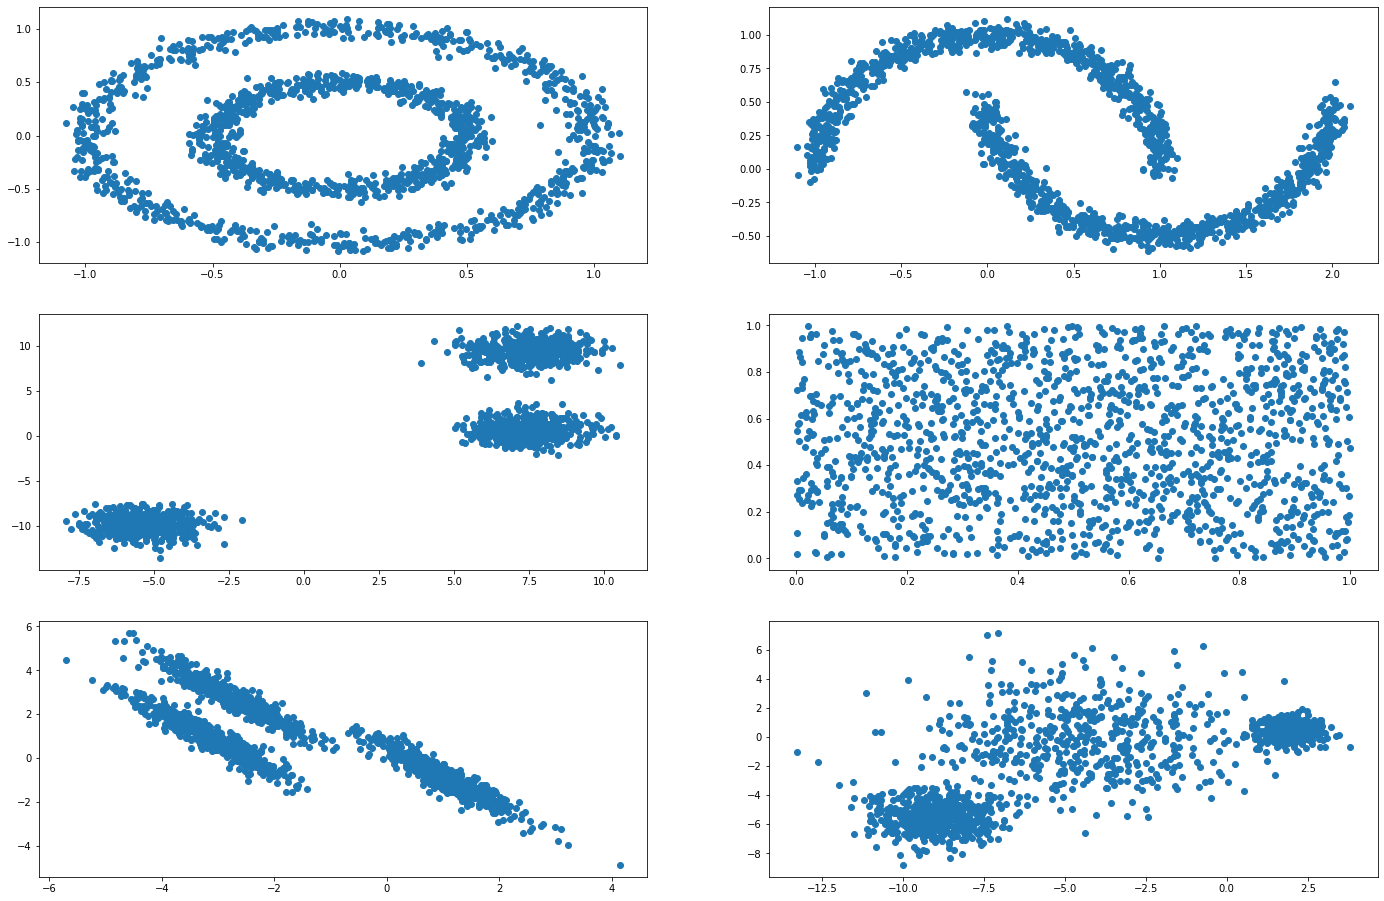

In [6]:
fig, axes = plt.subplots(3,2, figsize=(24,16))
axes[0,0].scatter(A[:,0], A[:,1])
axes[0,1].scatter(B[:,0], B[:,1])
axes[1,0].scatter(C[:,0], C[:,1])
axes[1,1].scatter(D[:,0], D[:,1])
axes[2,0].scatter(E[:,0], E[:,1])
axes[2,1].scatter(F[:,0], F[:,1])

## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

In [7]:
%time
from sklearn.cluster import KMeans
kmeans_A = KMeans(n_clusters=12, random_state=42).fit(A)
kmeans_B = KMeans(n_clusters=8, random_state=42).fit(B)
kmeans_C = KMeans(n_clusters=3, random_state=42).fit(C)
kmeans_D = KMeans(n_clusters=3, random_state=42).fit(D)
kmeans_E = KMeans(n_clusters=3, random_state=42).fit(E)
kmeans_F = KMeans(n_clusters=3, random_state=42).fit(F)

cluster_A = kmeans_A.cluster_centers_
cluster_B = kmeans_B.cluster_centers_
cluster_C = kmeans_C.cluster_centers_
cluster_D = kmeans_D.cluster_centers_
cluster_E = kmeans_E.cluster_centers_
cluster_F = kmeans_F.cluster_centers_

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs


In [8]:
%time
from sklearn.cluster import KMeans
kmeans_A = KMeans(n_clusters=12, init='k-means++').fit(A)
kmeans_B = KMeans(n_clusters=8, init='k-means++').fit(B)
kmeans_C = KMeans(n_clusters=3, init='k-means++').fit(C)
kmeans_D = KMeans(n_clusters=3, init='k-means++').fit(D)
kmeans_E = KMeans(n_clusters=3, init='k-means++').fit(E)
kmeans_F = KMeans(n_clusters=3, init='k-means++').fit(F)

cluster_A = kmeans_A.cluster_centers_
cluster_B = kmeans_B.cluster_centers_
cluster_C = kmeans_C.cluster_centers_
cluster_D = kmeans_D.cluster_centers_
cluster_E = kmeans_E.cluster_centers_
cluster_F = kmeans_F.cluster_centers_

CPU times: user 14 µs, sys: 2 µs, total: 16 µs
Wall time: 7.15 µs


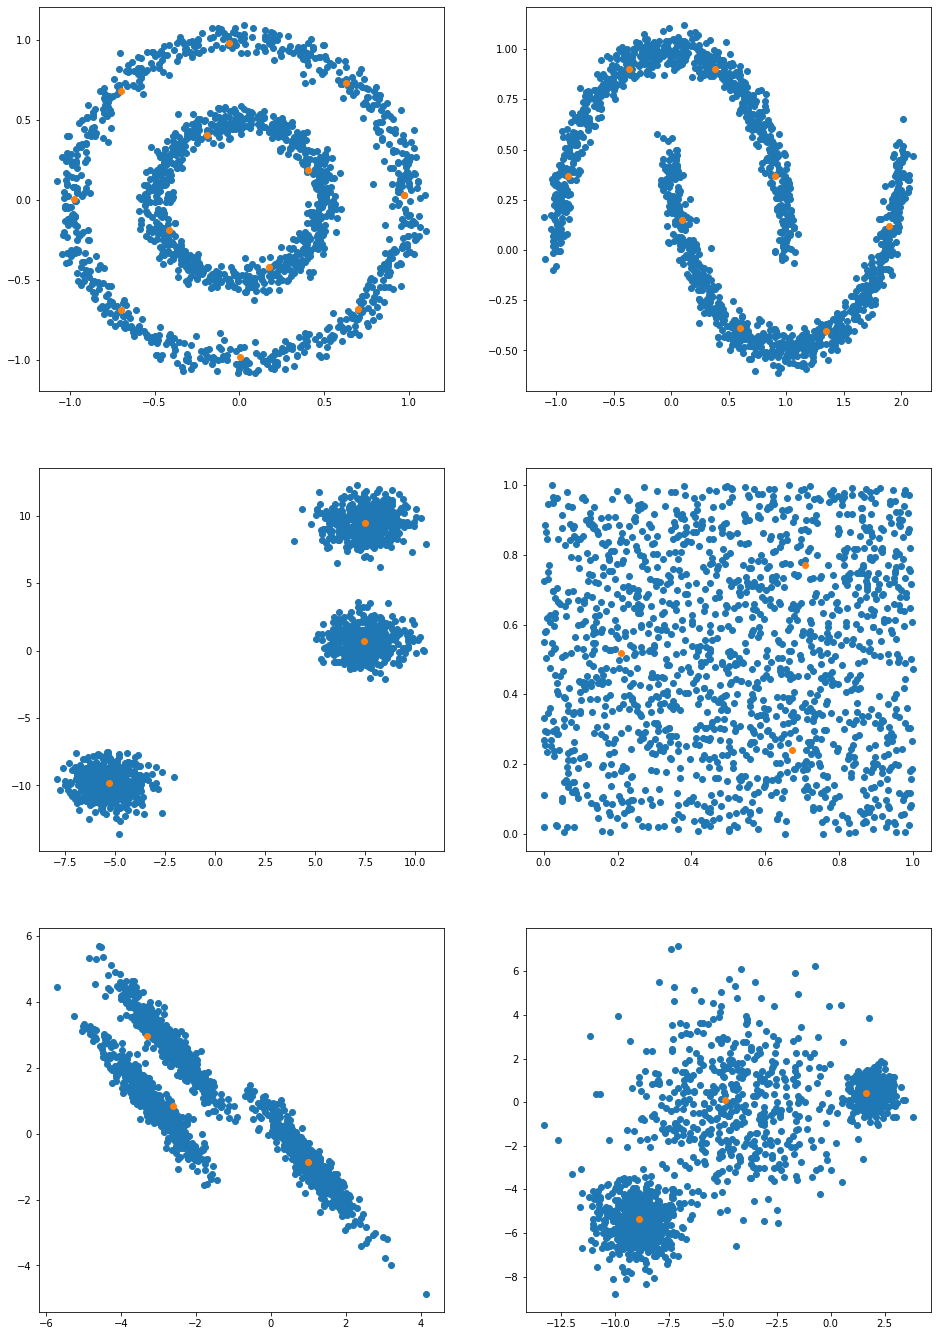

In [9]:
fig, axes = plt.subplots(3,2, figsize=(16,24))
axes[0,0].scatter(A[:,0], A[:,1])
axes[0,0].scatter(cluster_A[:,0], cluster_A[:,1])
axes[0,1].scatter(B[:,0], B[:,1])
axes[0,1].scatter(cluster_B[:,0], cluster_B[:,1])
axes[1,0].scatter(C[:,0], C[:,1])
axes[1,0].scatter(cluster_C[:,0], cluster_C[:,1])
axes[1,1].scatter(D[:,0], D[:,1])
axes[1,1].scatter(cluster_D[:,0], cluster_D[:,1])
axes[2,0].scatter(E[:,0], E[:,1])
axes[2,0].scatter(cluster_E[:,0], cluster_E[:,1])
axes[2,1].scatter(F[:,0], F[:,1])
axes[2,1].scatter(cluster_F[:,0], cluster_F[:,1])

## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN


In [10]:
from sklearn.cluster import DBSCAN
clusterA = DBSCAN(eps=3, min_samples=2).fit(A)
clusterB = DBSCAN(eps=3, min_samples=2).fit(B)
clusterC = DBSCAN(eps=3, min_samples=2).fit(C)
clusterD = DBSCAN(eps=3, min_samples=2).fit(D)
clusterE = DBSCAN(eps=3, min_samples=2).fit(E)
clusterF = DBSCAN(eps=3, min_samples=2).fit(F)

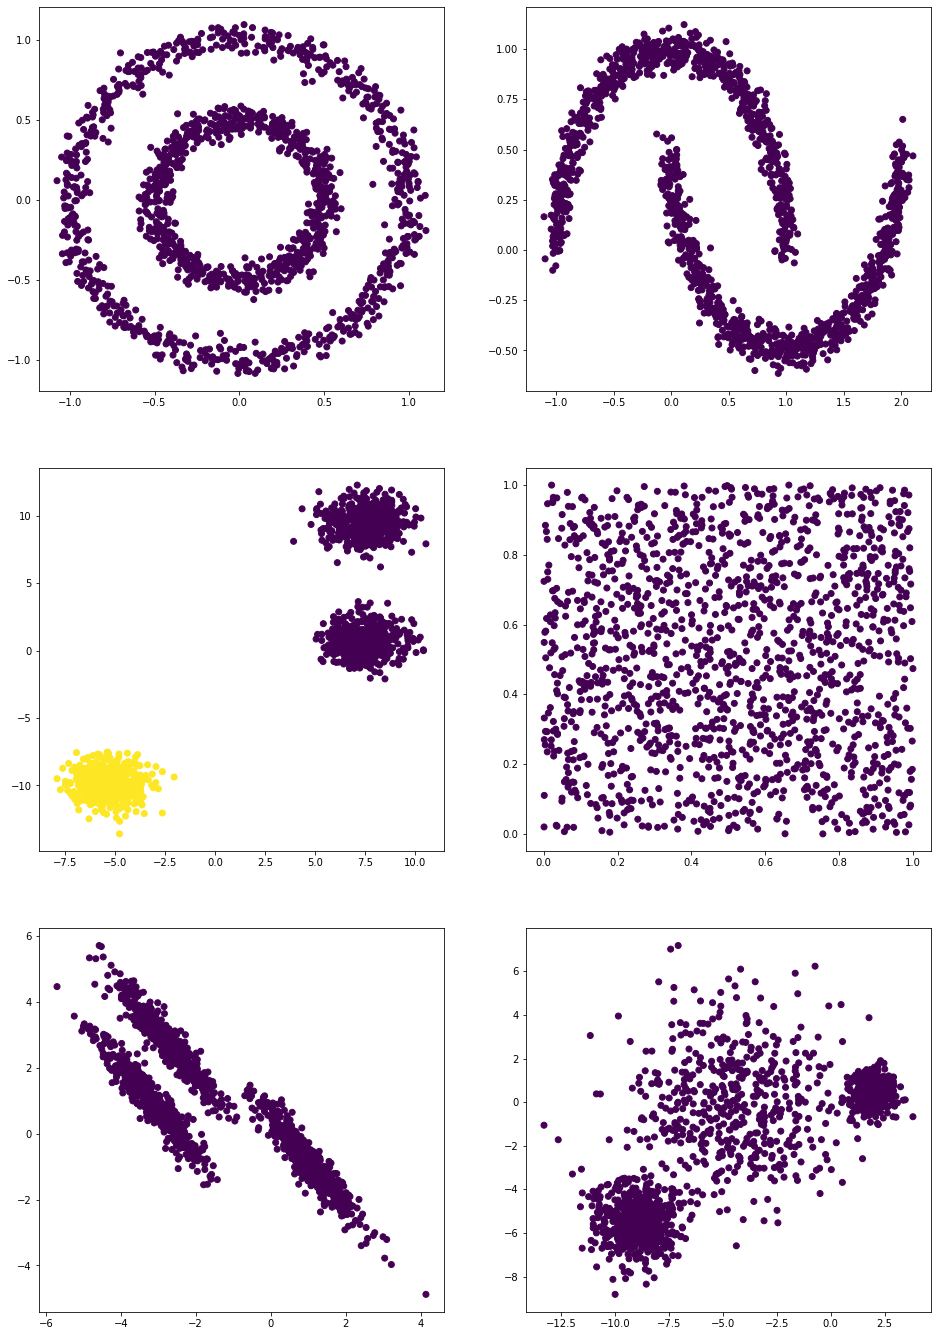

In [12]:
fig, axes = plt.subplots(3, 2,figsize=(16,24))
axes[0, 0].scatter(A[:,0], A[:,1], c=clusterA.labels_)
axes[0, 1].scatter(B[:,0], B[:,1], c=clusterB.labels_)
axes[1, 0].scatter(C[:,0], C[:,1], c=clusterC.labels_)
axes[1, 1].scatter(D[:,0], D[:,1], c=clusterD.labels_)
axes[2, 0].scatter(E[:,0], E[:,1], c=clusterE.labels_)
axes[2, 1].scatter(F[:,0], F[:,1], c=clusterF.labels_)